<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230306/%EC%9D%B4%EC%A4%80%EC%9A%B0_5_1_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정트리

#핵심 키워드
##결정트리
* 결정트리는 예/아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘입니다.
* 비교적 예측과정을 이해하기 쉽고 성능도 뛰어납니다.
##불순도
* 불순도는 결정트리가 최적의 질문을 찾기위한 기준입니다.
* 사이킷런은 지니 불순도와 엔트로피 불순도를 제공한다.
##정보이득
* 정보이득은 부모노드와 자식노드의 불순도차이이다.
* 결정트리 알고리즘은 정보 이득이 최대화되도록 학습합니다.
##가지치기
* 결정트리는 제한 없이 성장하면 훈련세트에 과대적합되기 쉽습니다.
* 가지치기는 결정트리의 성장을 제한하는 방법입니다.
* 사이킷런의 결정 트리 알고리즘은 여러가지 가지치기 매개변수를 제공합니다.
##특성중요도
* 특성중요도는 결정트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값이다.
* 특성중요도를 계산할 수 있는 것이 결정트리의 또 다른 큰 장점이다

###로지스틱 회귀로 먼저 분류해보기

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


* 레드와인과 화이트 와인을 구분하는 이진분류문제이고, 화이트와인이 양성클래스, 전체 데이터에서 화이트 와인을 골라내는 문제

###pandas 메서드
* info() = 각열의 데이터 타입과 누락된 데이터가 있는지 확인할때 사용
* describe() = 열에 대한 간략한 통계를 출력해줌(최소, 최대, 평균값)

In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled =ss.transform(test_input)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 로지스틱 회귀 모델이 '왜' 저런 계수값을 학습했는지 이해하기 어려움.(학습의 결과 설명불가)

#설명하기 쉬운 모델 = 결정트리

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


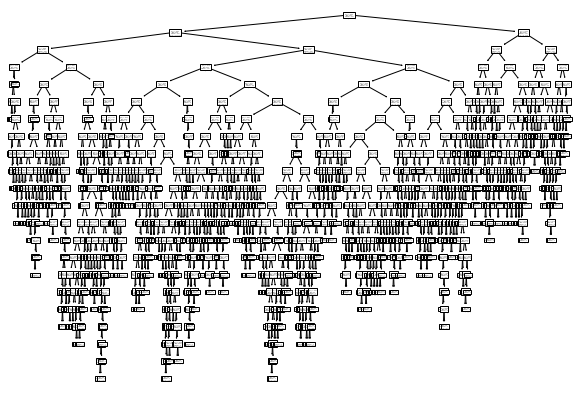

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

##max_depth매개변수를 사용하여 값을 1롤 주면 루트노드를 제외하고 하나의 노드를 확장해서 그림
##filled매개변수에서 클래스에 맞게 노드의 색을 칠할 수 있음

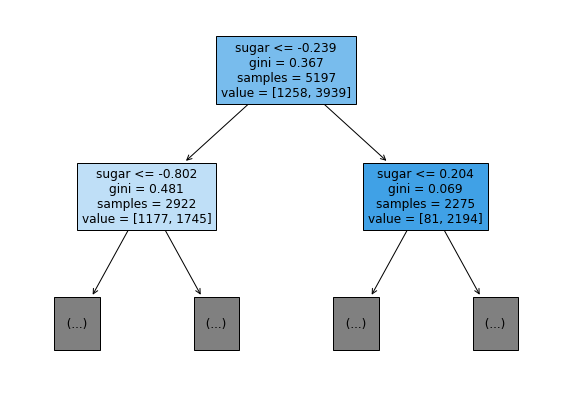

In [22]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth = 1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

##테스트 조건(sugar)
##불순도(gini)
##총 샘플 수(samples)
##클래스별 샘플 수(value)

###gini = 지니 불순도를 의미함
* DecisionTreeClassifier 클래스의 criterion매개변수의 기본값이 gini이다
* 지니불순도 구하기
* 클래스의 비율을 제곱해서 더한 다음 1에서 빼면 된다
* (지니불순도=1-(음성클래시비율**2+양성클래스비율**2)

###결정트리모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.
#### 부모노드와 자식노드의 불순도 차이를 계산하는 방법은 자식노드의 불순도를 샘플개수에 비례하여 모두 더한후 부모노드의 불순도에서 빼면 된다
####이러한 부모와 자식 노드 사이의 불순도 차이를 정보 이득이라고 부릅니다.

##가지치기

In [24]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


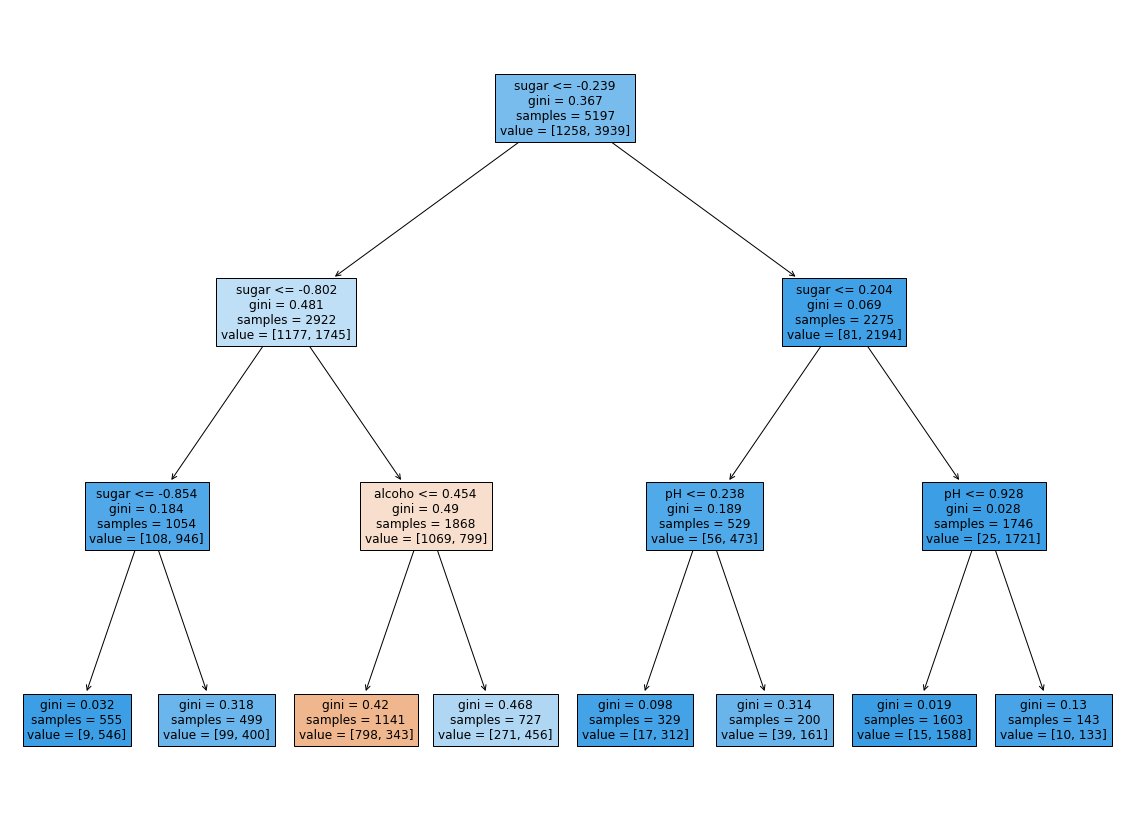

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcoho','sugar','pH'])
plt.show()

In [29]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input,test_target))

0.8454877814123533
0.8415384615384616


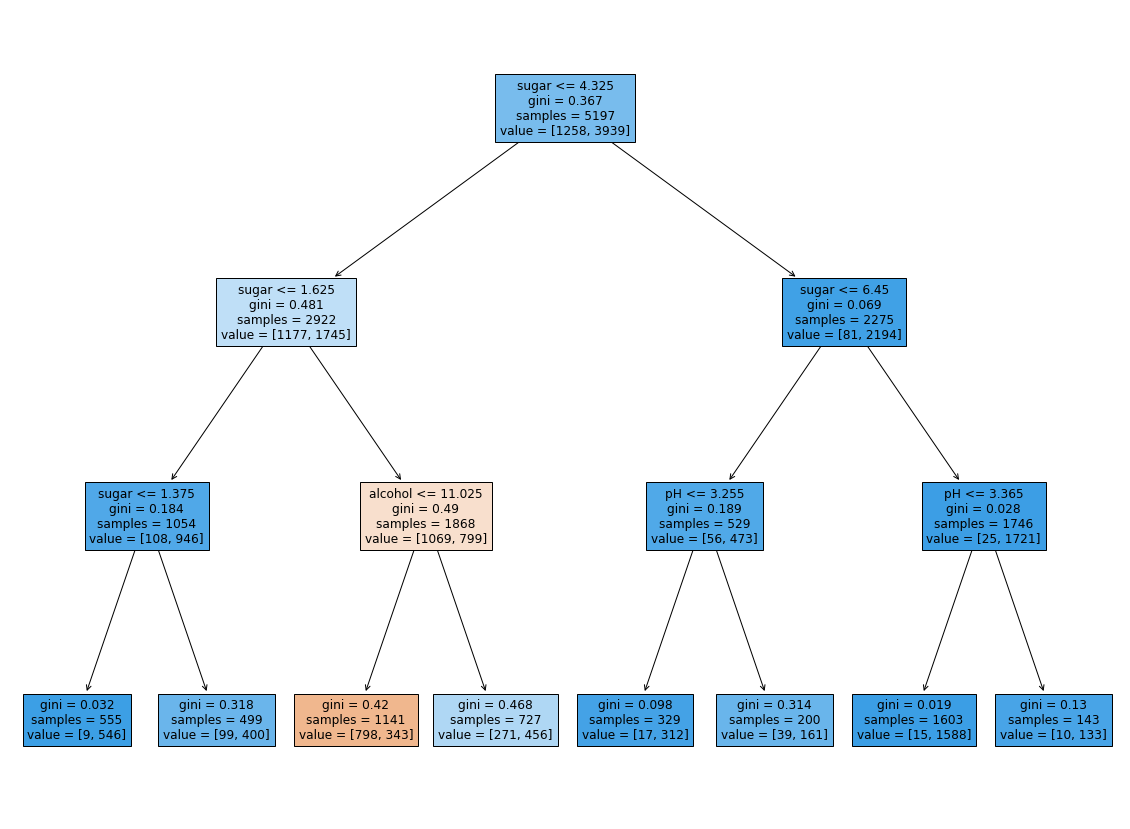

In [30]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [31]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
